# Start of notebook

In [1]:
%pip install kaggle

  Using cached kaggle-1.5.12.tar.gz (58 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 78.2/78.2 kB 859.7 kB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=2fa43a468210b09d53eb555c9972c20ca6e32fa7eaa7139c4fd9a721545a3443
  Stored in directory: c:\users\adminasus\appdata\local\pip\cache\wheels\29\da\11\144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, models, optimizers, callbacks
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#https://www.kaggle.com/datasets/dineshpiyasamara/geometric-shapes-dataset
#kaggle datasets download -d dineshpiyasamara/geometric-shapes-dataset

In [2]:
#train_path = 'DS_figures/train'
#test_path = 'DS_figures/test'
path = 'DS_figures/geometric shapes dataset'
height, width = (128,128)

In [3]:
AUTOTUNE = tf.data.AUTOTUNE
train_path = 'DS_figures/train'
test_path = 'DS_figures/test'
train = keras.utils.image_dataset_from_directory(train_path,  image_size = (height, width), seed = 123).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = keras.utils.image_dataset_from_directory(test_path,  image_size = (height, width)).cache().prefetch(buffer_size=AUTOTUNE)

Found 12 files belonging to 3 classes.
Found 9 files belonging to 3 classes.


In [17]:
path = 'DS_figures/geometric shapes dataset'

AUTOTUNE = tf.data.AUTOTUNE
train = keras.utils.image_dataset_from_directory(path, subset = 'training', validation_split = 0.2,  image_size = (height, width), seed = 123, batch_size = 128)
test = keras.utils.image_dataset_from_directory(path,  subset = 'validation', validation_split = 0.2, image_size = (height, width), seed = 123, batch_size = 128)

Found 30000 files belonging to 3 classes.
Using 24000 files for training.
Found 30000 files belonging to 3 classes.
Using 6000 files for validation.


In [18]:
class_names = train.class_names
print(class_names)

['Circle', 'Square', 'Triangle']


In [ ]:
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test = test.cache().prefetch(buffer_size=AUTOTUNE)

NameError: name 'class_names' is not defined

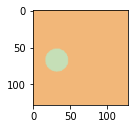

In [7]:
plt.figure(figsize=(20,5))
for images, labels in train.take(1):
    for i in range(10):
        ax = plt.subplot(1, 10, i + 1 )
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        img = images[i]

print(img.shape)

In [11]:
data_augmentation = keras.Sequential(
  [layers.RandomFlip("horizontal", input_shape=(height, width, 3)),
    layers.RandomFlip("vertical"),
    layers.RandomRotation(0.25),
    layers.RandomZoom(0.25),
  ]
)

In [20]:
model = models.Sequential([
    #data_augmentation,
    layers.Rescaling(1./255, input_shape=(height, width, 3)),
    Conv2D(filters = 32, kernel_size =(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters = 64, kernel_size =(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters = 128, kernel_size =(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters = 256, kernel_size =(3,3), padding='same', activation='relu'),
    MaxPooling2D(),
    layers.Dropout(0.2),
    Flatten(),
    Dense(len(class_names))
])

model.compile(optimizer='adam', loss = losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 128)      

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.90:
            print('\nReached 90% accuracy and that is enough', logs.get('loss'))
            self.model.stop_training = True
            for l in logs:
                print(l)

In [21]:
model_checkpoint = callbacks.ModelCheckpoint('chk_ptn_class_geo', save_best_only= True)
model_earlyStop = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [22]:
history = model.fit(train, validation_data=test, epochs=32, callbacks=[model_earlyStop, model_checkpoint])

Epoch 1/32
188/188 [==============================] - 260s 1s/step - loss: 0.9706 - accuracy: 0.4939 - val_loss: 0.7751 - val_accuracy: 0.6393
Epoch 2/32
188/188 [==============================] - 191s 1s/step - loss: 0.6402 - accuracy: 0.7112 - val_loss: 0.4784 - val_accuracy: 0.8020
Epoch 3/32
188/188 [==============================] - 190s 1s/step - loss: 0.2655 - accuracy: 0.8989 - val_loss: 0.1017 - val_accuracy: 0.9670
Epoch 4/32
188/188 [==============================] - 189s 1s/step - loss: 0.0736 - accuracy: 0.9775 - val_loss: 0.0400 - val_accuracy: 0.9905
Epoch 5/32
188/188 [==============================] - 190s 1s/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.0331 - val_accuracy: 0.9908
Epoch 6/32
188/188 [==============================] - 188s 1s/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.0291 - val_accuracy: 0.9925
Epoch 7/32
188/188 [==============================] - 189s 1s/step - loss: 0.0166 - accuracy: 0.9962 - val_loss: 0.0120 - val_accuracy: 0.9968

Load the model from check point

128


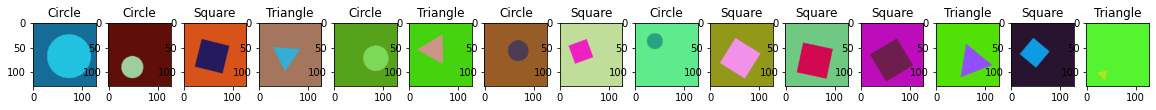

In [22]:
model = keras.models.load_model('chk_ptn_class_geo')
test_images = []
for images, labels in test.take(1):
    for image in images:
        test_images.append(image)
    break
print(len(test_images))
res = model.predict(np.array(test_images))
#print(res)
plt.figure(figsize=(20,5))
for i in range(15):
    ax = plt.subplot(1, 15, i + 1 )
    #img = test_images[i]
    plt.imshow(test_images[i].numpy().astype('uint8'))
    plt.title(class_names[np.argmax(res[i])])
    #img = images[i]

Visualizing Intermediate Representations

In [27]:
model.layers[1], model.layers[1].name, model.layers[1].output,

(<keras.layers.convolutional.Conv2D at 0x285e700eb50>,
 'conv2d_8',
 <KerasTensor: shape=(None, 128, 128, 32) dtype=float32 (created by layer 'conv2d_8')>)

In [38]:
import random
type(test_images[0].numpy()), random.randint(0, 10)

(numpy.ndarray, 10)

C:\Users\AdminAsus\AppData\Local\Temp\ipykernel_6972\1616390421.py:25: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()
C:\Users\AdminAsus\AppData\Local\Temp\ipykernel_6972\1616390421.py:42: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


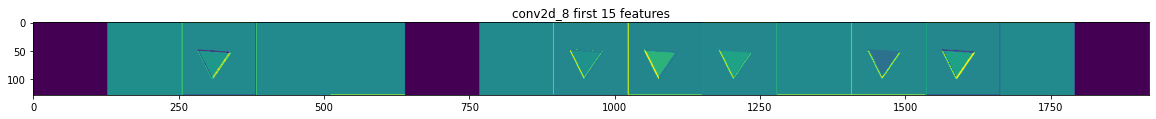

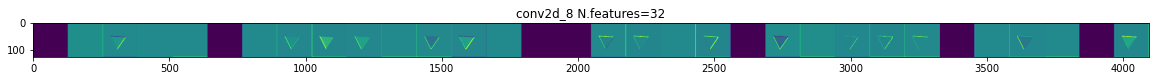

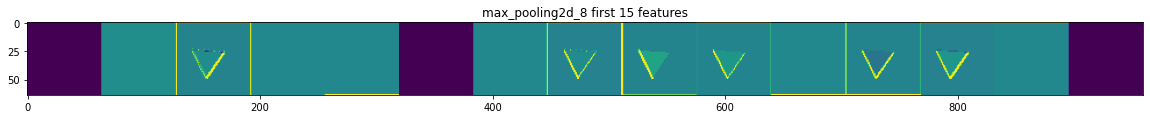

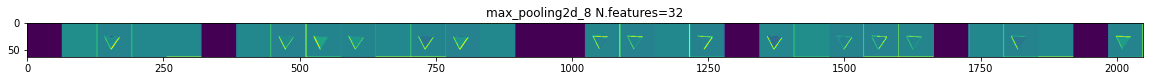

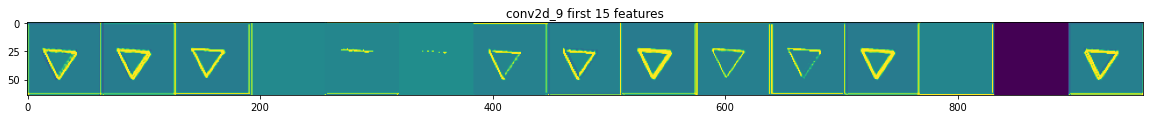

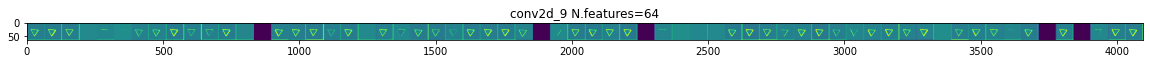

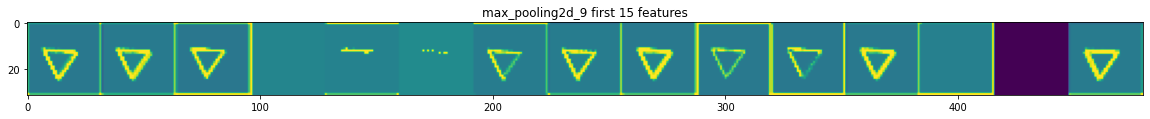

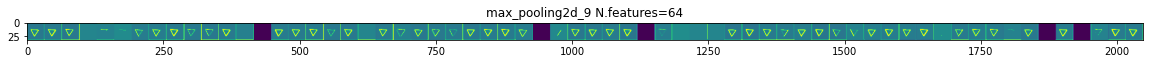

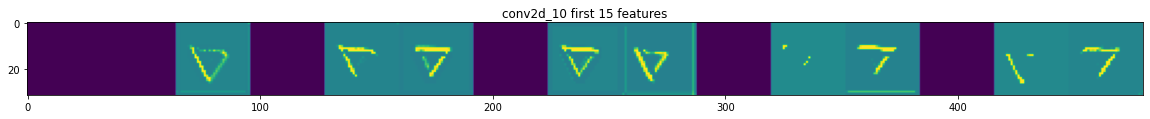

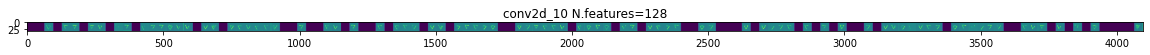

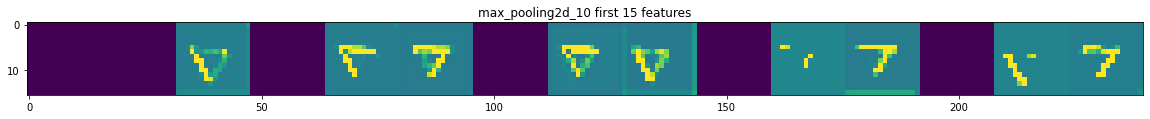

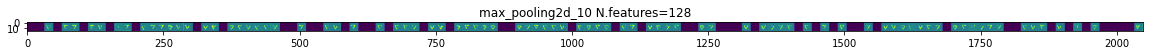

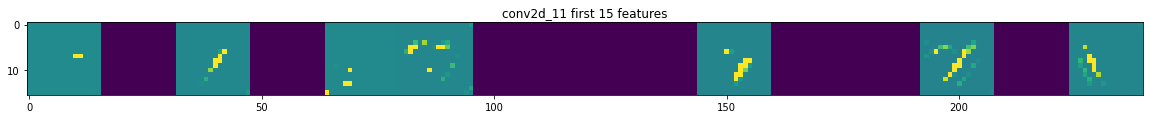

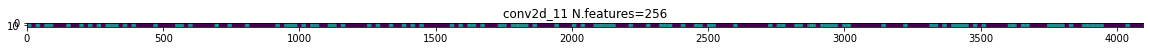

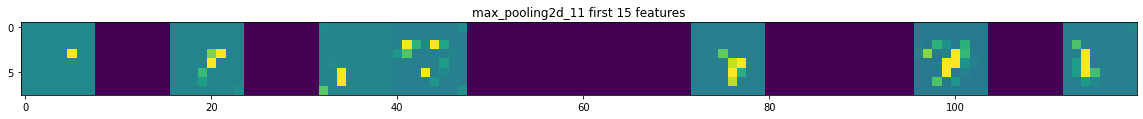

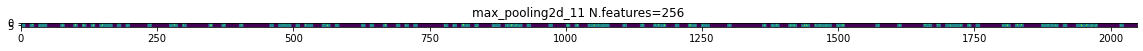

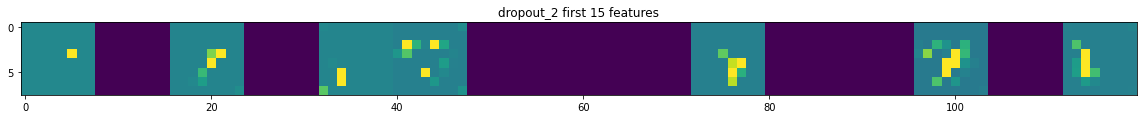

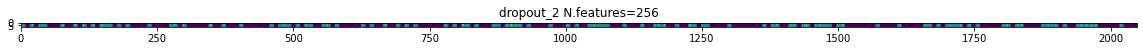

In [51]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

x = test_images[3].numpy()
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

successive_feature_maps = visualization_model.predict(x.reshape((1,) + x.shape))
layer_names = [layer.name for layer in model.layers[1:]]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #Just for Conv and MaxPool layers, not for Dense
        n_features = feature_map.shape[-1]
        #feature_map has shape (1, size, size, n_features)

        size = feature_map.shape[1]
        first10 = min(15, n_features)
        display_grid = np.zeros((size, size * first10))

        for i in range(first10):
            x = feature_map[0,:,:, i]
            x -=x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size:(1+i)*size] = x
        scale = 20./ first10
        plt.figure(figsize=(scale * first10, scale))
        plt.title(layer_name + ' first ' + str(first10) + ' features')
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

        size = feature_map.shape[1]
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            x = feature_map[0,:,:, i]
            x -=x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i*size:(1+i)*size] = x
        scale = 20./ n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name + ' N.features=' + str(n_features))

        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')